# Medyczne zastosowania uczenia maszynowego - zadanie 1

# Temat: Ewaluacja modelu w oparciu o podstawowe parametry

Analiza zbiorów danych dotyczących raka prostaty, zawierających próbki moczu, surowicy i tkanek

Katarzyna Pieczonka, nr indeksu 132785 </br>
Informatyka II stopień, semestr zimowy </br>
rok akademicki 2024/25 

1. Wczytanie bibliotek i zbiorów danych

In [59]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

#Odczytanie zbiorów danych
dataset1 = pd.read_csv('mocz_1chory_0zdrowy.csv', delimiter=';', dtype=float, decimal=',')
dataset2 = pd.read_csv('surowica_1chory_0zdrowy.csv', delimiter=';', dtype=float, decimal=',')
dataset3 = pd.read_csv('tkanka_1chory_0zdrowy.csv', delimiter=';', dtype=float, decimal=',')

noColumn1 = dataset1.shape[1]
noColumn2 = dataset2.shape[1]
noColumn3 = dataset3.shape[1]

2. Przygotowanie zbiorów danych - sprawdzanie brakujących wartości i usuwanie duplikatów. 

In [60]:
#Sprawdzanie braków danych w dataset1
print("Liczba brakujących wartości dla poszczególnych kolumn w dataset1:")
missing_values = dataset1.isnull().sum()
for col, value in missing_values.items():
    if value != 0:
        print(f"{col}, brak: {value} wartości")

#Sprawdzanie duplikatów w dataset1
duplicates = dataset1.duplicated().sum()
print(f"Duplikaty: {duplicates}")
dataset1 = dataset1.drop_duplicates()

#####################################################

#Sprawdzanie braków danych w dataset2
print("Liczba brakujących wartości dla poszczególnych kolumn w dataset2:")
missing_values2 = dataset2.isnull().sum()
for col, value in missing_values2.items():
    if value != 0:
        print(f"{col}, brak: {value} wartości")

#Sprawdzanie duplikatów w dataset2
duplicates2 = dataset2.duplicated().sum()
print(f"Duplikaty: {duplicates2}")
dataset2 = dataset2.drop_duplicates()

####################################################

#Sprawdzanie braków danych w dataset3
print("Liczba brakujących wartości dla poszczególnych kolumn w dataset3:")
missing_values3 = dataset3.isnull().sum()
for col, value in missing_values3.items():
    if value != 0:
        print(f"{col}, brak: {value} wartości")

#Sprawdzanie duplikatów w dataset3
duplicates3 = dataset3.duplicated().sum()
print(f"Duplikaty: {duplicates3}")
dataset3 = dataset3.drop_duplicates()

Liczba brakujących wartości dla poszczególnych kolumn w dataset1:
Duplikaty: 2
Liczba brakujących wartości dla poszczególnych kolumn w dataset2:
Duplikaty: 0
Liczba brakujących wartości dla poszczególnych kolumn w dataset3:
Duplikaty: 2


3. Analiza dataset1 - zbiór danych zawierajacy wyniki badań próbek moczu

In [61]:
#print(dataset1)

features = dataset1.iloc[:,:noColumn1-1]
labels = dataset1.iloc[:,[noColumn1-1]]

datasets = train_test_split(features, labels, test_size=0.6, random_state=1234)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]

#Skalowanie cech
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# Tworzenie modelu Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(features_train, np.ravel(labels_train)) #Uczenie klasyfikatora na części treningowej
labels_predicted = model.predict(features_test) #Generowania decyzji dla części testowej

print("***Kroswalidacja***")
# Kroswalidacja z wykorzystaniem Stratyfikowanego KFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, features_train, np.ravel(labels_train), cv=stratified_kfold, scoring='accuracy')

print(f"Dokładności w poszczególnych foldach: {scores}")
print(f"Średnia dokładność: {scores.mean() * 100:.2f}%")
print(f"Odchylenie standardowe dokładności: {scores.std() * 100:.2f}%")

print("***Wyniki jakości***")
#Wyświetlenie wyników jakości
accuracy = accuracy_score(labels_test, labels_predicted)
precision = precision_score(labels_test, labels_predicted, average='weighted')  # Zakładam dane z wieloma klasami, dlatego 'weighted'
recall = recall_score(labels_test, labels_predicted, average='weighted')
f1 = f1_score(labels_test, labels_predicted, average='weighted') 

print(f"Dokładność (Accuracy): {accuracy * 100:.2f}%")
print(f"Precyzja (Precision): {precision:.2f}")
print(f"Czułość (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("***Macierz pomyłek***")
#Macierz pomyłek
conf_matrix = confusion_matrix(labels_test, labels_predicted)
print(conf_matrix)

print("***Raport klasyfikacji***")
#Raport klasyfikacji
report = classification_report(labels_test, labels_predicted)
print(report )

***Kroswalidacja***
Dokładności w poszczególnych foldach: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.81818182]
Średnia dokładność: 98.18%
Odchylenie standardowe dokładności: 5.45%
***Wyniki jakości***
Dokładność (Accuracy): 98.80%
Precyzja (Precision): 0.99
Czułość (Recall): 0.99
F1-Score: 0.99
***Macierz pomyłek***
[[69  0]
 [ 2 95]]
***Raport klasyfikacji***
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        69
         1.0       1.00      0.98      0.99        97

    accuracy                           0.99       166
   macro avg       0.99      0.99      0.99       166
weighted avg       0.99      0.99      0.99       166



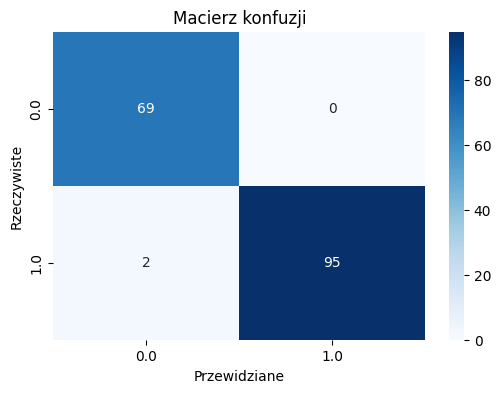

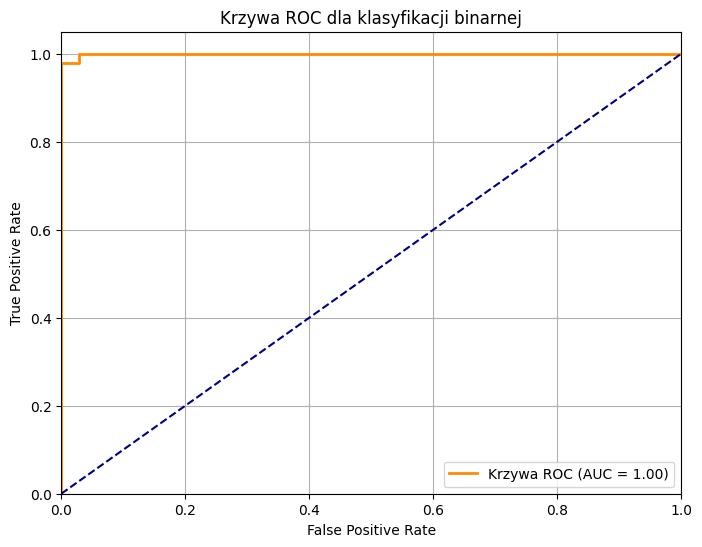

In [62]:
#Wizualizacja graficzna macierzy pomyłek 
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title("Macierz konfuzji")
plt.xlabel("Przewidziane")
plt.ylabel("Rzeczywiste")
plt.show()


#Wykres krzywej ROC
labels_pred_prob = model.predict_proba(features_test)[:, 1]

fpr, tpr, _ = roc_curve(labels_test, labels_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Krzywa ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC dla klasyfikacji binarnej')
plt.legend(loc="lower right")
plt.grid()
plt.show()



Krzywa uczenia:

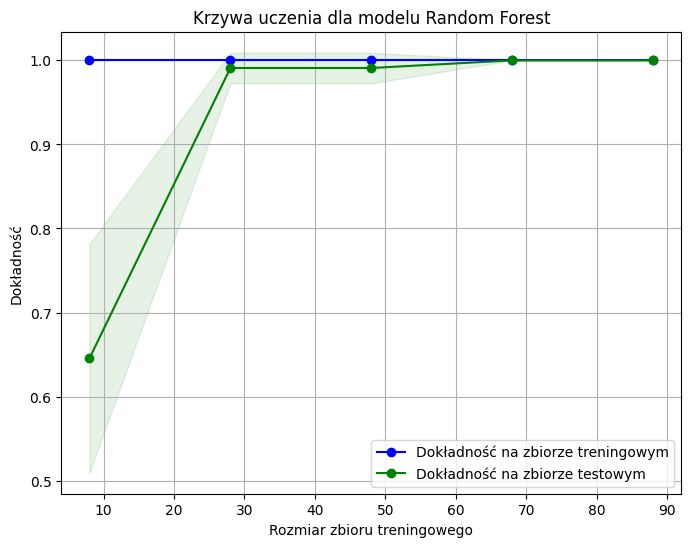

In [63]:
#Generowanie krzywej uczenia
train_sizes, train_scores, test_scores = learning_curve(model, features_train, np.ravel(labels_train), cv=5, scoring='accuracy', n_jobs=-1)

#Obliczanie średniej i odchylenia standardowego
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#Wykres
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Dokładność na zbiorze treningowym", color="blue", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Dokładność na zbiorze testowym", color="green", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="green")
plt.title("Krzywa uczenia dla modelu Random Forest")
plt.xlabel("Rozmiar zbioru treningowego")
plt.ylabel("Dokładność")
plt.legend(loc="best")
plt.grid()
plt.show()

Sprawdzenie wyników dla innych parametrów modelu

In [64]:
# Tworzenie modelu Random Forest
model = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=42)
model.fit(features_train, np.ravel(labels_train)) #Uczenie klasyfikatora na części treningowej
labels_predicted = model.predict(features_test) #Generowania decyzji dla części testowej

print("***Kroswalidacja***")
# Kroswalidacja z wykorzystaniem Stratyfikowanego KFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, features_train, np.ravel(labels_train), cv=stratified_kfold, scoring='accuracy')

print(f"Dokładności w poszczególnych foldach: {scores}")
print(f"Średnia dokładność: {scores.mean() * 100:.2f}%")
print(f"Odchylenie standardowe dokładności: {scores.std() * 100:.2f}%")

print("***Wyniki jakości***")
#Wyświetlenie wyników jakości
accuracy = accuracy_score(labels_test, labels_predicted)
precision = precision_score(labels_test, labels_predicted, average='weighted')  # Zakładam dane z wieloma klasami, dlatego 'weighted'
recall = recall_score(labels_test, labels_predicted, average='weighted')
f1 = f1_score(labels_test, labels_predicted, average='weighted') 

print(f"Dokładność (Accuracy): {accuracy * 100:.2f}%")
print(f"Precyzja (Precision): {precision:.2f}")
print(f"Czułość (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("***Macierz pomyłek***")
#Macierz pomyłek
conf_matrix = confusion_matrix(labels_test, labels_predicted)
print(conf_matrix)

print("***Raport klasyfikacji***")
#Raport klasyfikacji
report = classification_report(labels_test, labels_predicted)
print(report )

***Kroswalidacja***
Dokładności w poszczególnych foldach: [1.         1.         1.         0.90909091 1.         1.
 1.         1.         1.         0.90909091]
Średnia dokładność: 98.18%
Odchylenie standardowe dokładności: 3.64%
***Wyniki jakości***
Dokładność (Accuracy): 98.80%
Precyzja (Precision): 0.99
Czułość (Recall): 0.99
F1-Score: 0.99
***Macierz pomyłek***
[[69  0]
 [ 2 95]]
***Raport klasyfikacji***
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        69
         1.0       1.00      0.98      0.99        97

    accuracy                           0.99       166
   macro avg       0.99      0.99      0.99       166
weighted avg       0.99      0.99      0.99       166



4. Analiza dataset2 - zbiór danych zawierajacy wyniki badań próbek surowicy

In [65]:
features = dataset2.iloc[:,:noColumn1-1]
labels = dataset2.iloc[:,[noColumn1-1]]

datasets = train_test_split(features, labels, test_size=0.6, random_state=1234)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]

#Skalowanie cech
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# Tworzenie modelu Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(features_train, np.ravel(labels_train)) #Uczenie klasyfikatora na części treningowej
labels_predicted = model.predict(features_test) #Generowania decyzji dla części testowej

print("***Kroswalidacja***")
# Kroswalidacja z wykorzystaniem Stratyfikowanego KFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, features_train, np.ravel(labels_train), cv=stratified_kfold, scoring='accuracy')

print(f"Dokładności w poszczególnych foldach: {scores}")
print(f"Średnia dokładność: {scores.mean() * 100:.2f}%")
print(f"Odchylenie standardowe dokładności: {scores.std() * 100:.2f}%")

print("***Wyniki jakości***")
#Wyświetlenie wyników jakości
accuracy = accuracy_score(labels_test, labels_predicted)
precision = precision_score(labels_test, labels_predicted, average='weighted')  # Zakładam dane z wieloma klasami, dlatego 'weighted'
recall = recall_score(labels_test, labels_predicted, average='weighted')
f1 = f1_score(labels_test, labels_predicted, average='weighted') 

print(f"Dokładność (Accuracy): {accuracy * 100:.2f}%")
print(f"Precyzja (Precision): {precision:.2f}")
print(f"Czułość (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("***Macierz pomyłek***")
#Macierz pomyłek
conf_matrix = confusion_matrix(labels_test, labels_predicted)
print(conf_matrix)

print("***Raport klasyfikacji***")
#Raport klasyfikacji
report = classification_report(labels_test, labels_predicted)
print(report )

***Kroswalidacja***
Dokładności w poszczególnych foldach: [0.72727273 0.81818182 0.90909091 0.81818182 0.63636364 0.72727273
 0.90909091 1.         0.81818182 0.72727273]
Średnia dokładność: 80.91%
Odchylenie standardowe dokładności: 10.33%
***Wyniki jakości***
Dokładność (Accuracy): 78.92%
Precyzja (Precision): 0.79
Czułość (Recall): 0.79
F1-Score: 0.79
***Macierz pomyłek***
[[53 16]
 [19 78]]
***Raport klasyfikacji***
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75        69
         1.0       0.83      0.80      0.82        97

    accuracy                           0.79       166
   macro avg       0.78      0.79      0.78       166
weighted avg       0.79      0.79      0.79       166



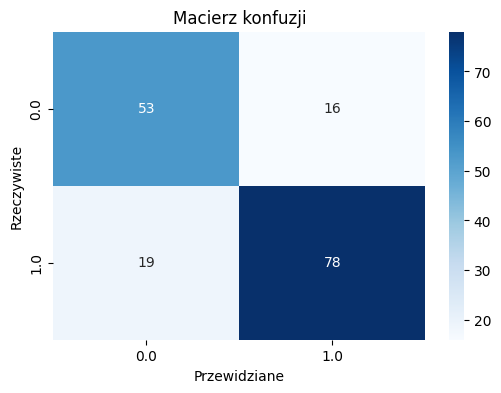

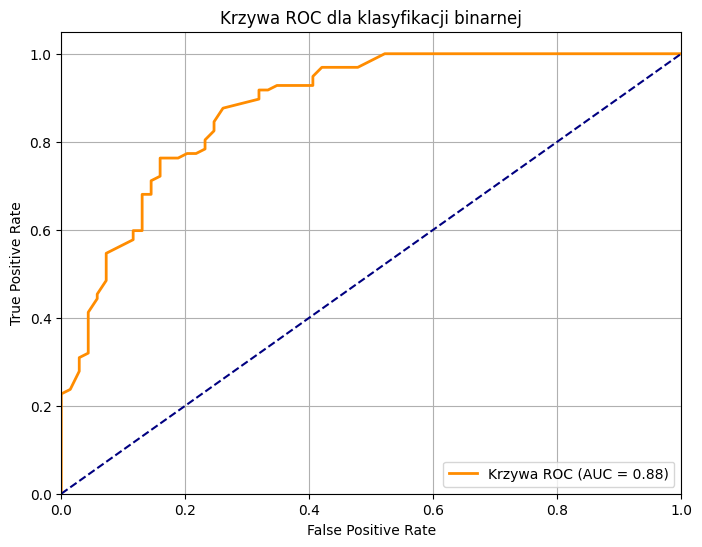

In [66]:
#Wizualizacja graficzna macierzy pomyłek 
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title("Macierz konfuzji")
plt.xlabel("Przewidziane")
plt.ylabel("Rzeczywiste")
plt.show()


#Wykres krzywej ROC
labels_pred_prob = model.predict_proba(features_test)[:, 1]

fpr, tpr, _ = roc_curve(labels_test, labels_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Krzywa ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC dla klasyfikacji binarnej')
plt.legend(loc="lower right")
plt.grid()
plt.show()



Krzywa uczenia:

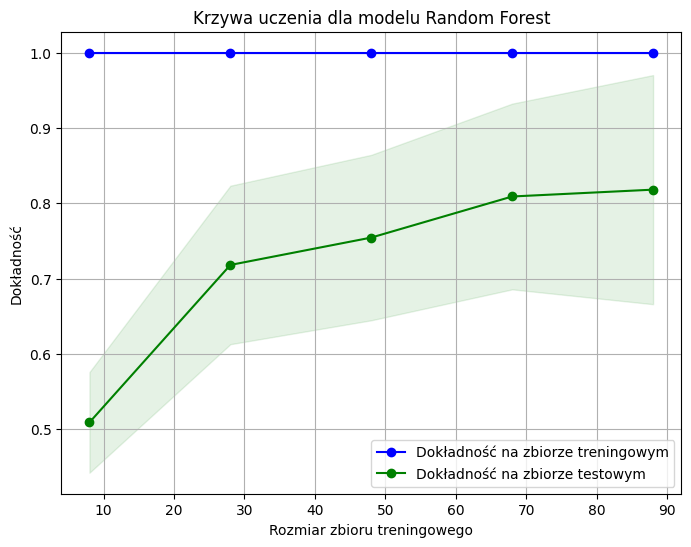

In [67]:
#Generowanie krzywej uczenia
train_sizes, train_scores, test_scores = learning_curve(model, features_train, np.ravel(labels_train), cv=5, scoring='accuracy', n_jobs=-1)

#Obliczanie średniej i odchylenia standardowego
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#Wykres
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Dokładność na zbiorze treningowym", color="blue", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Dokładność na zbiorze testowym", color="green", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="green")
plt.title("Krzywa uczenia dla modelu Random Forest")
plt.xlabel("Rozmiar zbioru treningowego")
plt.ylabel("Dokładność")
plt.legend(loc="best")
plt.grid()
plt.show()

Sprawdzenie wyników dla innego modelu - KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

# Tworzenie modelu K-najbliższych sąsiadów
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, np.ravel(labels_train)) #Uczenie klasyfikatora na części treningowej
labels_predicted = knn.predict(features_test) #Generowania decyzji dla części testowej

print("***Kroswalidacja***")
# Kroswalidacja z wykorzystaniem Stratyfikowanego KFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(knn, features_train, np.ravel(labels_train), cv=stratified_kfold, scoring='accuracy')

print(f"Dokładności w poszczególnych foldach: {scores}")
print(f"Średnia dokładność: {scores.mean() * 100:.2f}%")
print(f"Odchylenie standardowe dokładności: {scores.std() * 100:.2f}%")

print("***Wyniki jakości***")
#Wyświetlenie wyników jakości
accuracy = accuracy_score(labels_test, labels_predicted)
precision = precision_score(labels_test, labels_predicted, average='weighted')  # Zakładam dane z wieloma klasami, dlatego 'weighted'
recall = recall_score(labels_test, labels_predicted, average='weighted')
f1 = f1_score(labels_test, labels_predicted, average='weighted') 

print(f"Dokładność (Accuracy): {accuracy * 100:.2f}%")
print(f"Precyzja (Precision): {precision:.2f}")
print(f"Czułość (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("***Macierz pomyłek***")
#Macierz pomyłek
conf_matrix = confusion_matrix(labels_test, labels_predicted)
print(conf_matrix)

print("***Raport klasyfikacji***")
#Raport klasyfikacji
report = classification_report(labels_test, labels_predicted)
print(report )

***Kroswalidacja***
Dokładności w poszczególnych foldach: [0.81818182 0.72727273 0.81818182 0.63636364 0.81818182 0.81818182
 0.81818182 0.81818182 0.45454545 0.72727273]
Średnia dokładność: 74.55%
Odchylenie standardowe dokładności: 11.35%
***Wyniki jakości***
Dokładność (Accuracy): 75.30%
Precyzja (Precision): 0.75
Czułość (Recall): 0.75
F1-Score: 0.75
***Macierz pomyłek***
[[50 19]
 [22 75]]
***Raport klasyfikacji***
              precision    recall  f1-score   support

         0.0       0.69      0.72      0.71        69
         1.0       0.80      0.77      0.79        97

    accuracy                           0.75       166
   macro avg       0.75      0.75      0.75       166
weighted avg       0.75      0.75      0.75       166



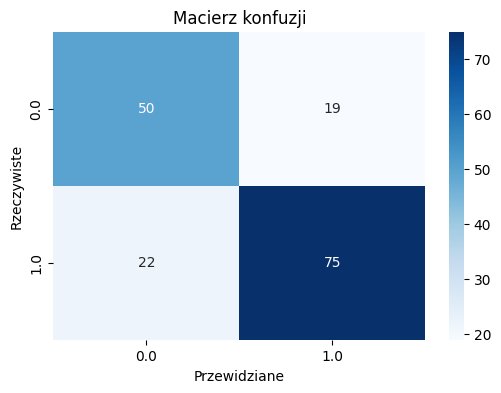

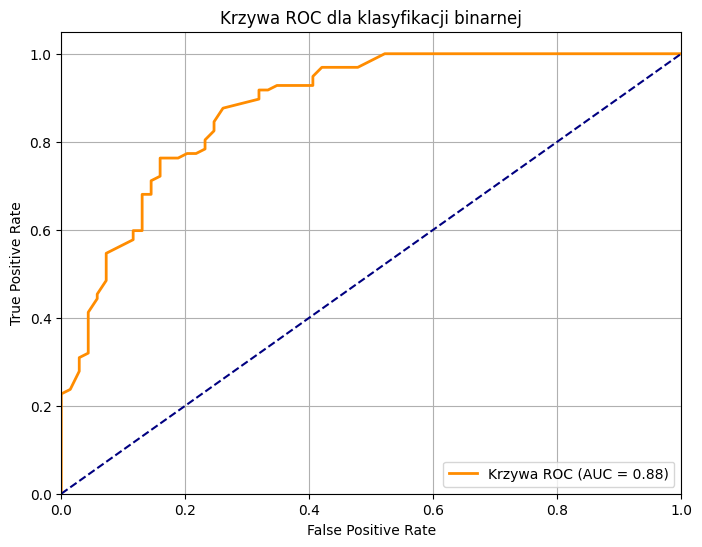

In [69]:
#Wizualizacja graficzna macierzy pomyłek 
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title("Macierz konfuzji")
plt.xlabel("Przewidziane")
plt.ylabel("Rzeczywiste")
plt.show()


#Wykres krzywej ROC
labels_pred_prob = model.predict_proba(features_test)[:, 1]

fpr, tpr, _ = roc_curve(labels_test, labels_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Krzywa ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC dla klasyfikacji binarnej')
plt.legend(loc="lower right")
plt.grid()
plt.show()



Krzywa uczenia: 

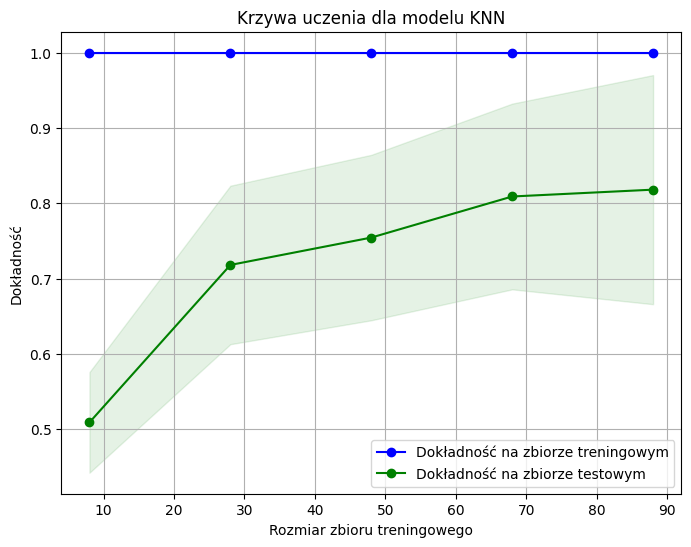

In [70]:
#Generowanie krzywej uczenia
train_sizes, train_scores, test_scores = learning_curve(model, features_train, np.ravel(labels_train), cv=5, scoring='accuracy', n_jobs=-1)

#Obliczanie średniej i odchylenia standardowego
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#Wykres
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Dokładność na zbiorze treningowym", color="blue", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Dokładność na zbiorze testowym", color="green", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="green")
plt.title("Krzywa uczenia dla modelu KNN")
plt.xlabel("Rozmiar zbioru treningowego")
plt.ylabel("Dokładność")
plt.legend(loc="best")
plt.grid()
plt.show()

5. Analiza dataset3 - zbiór danych zawierajacy wyniki badań próbek tkanek

In [71]:
features = dataset3.iloc[:,:noColumn1-1]
labels = dataset3.iloc[:,[noColumn1-1]]

datasets = train_test_split(features, labels, test_size=0.6, random_state=1234)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]

#Skalowanie cech
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# Tworzenie modelu Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(features_train, np.ravel(labels_train)) #Uczenie klasyfikatora na części treningowej
labels_predicted = model.predict(features_test) #Generowania decyzji dla części testowej

print("***Kroswalidacja***")
# Kroswalidacja z wykorzystaniem Stratyfikowanego KFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, features_train, np.ravel(labels_train), cv=stratified_kfold, scoring='accuracy')

print(f"Dokładności w poszczególnych foldach: {scores}")
print(f"Średnia dokładność: {scores.mean() * 100:.2f}%")
print(f"Odchylenie standardowe dokładności: {scores.std() * 100:.2f}%")

print("***Wyniki jakości***")
#Wyświetlenie wyników jakości
accuracy = accuracy_score(labels_test, labels_predicted)
precision = precision_score(labels_test, labels_predicted, average='weighted')  # Zakładam dane z wieloma klasami, dlatego 'weighted'
recall = recall_score(labels_test, labels_predicted, average='weighted')
f1 = f1_score(labels_test, labels_predicted, average='weighted') 

print(f"Dokładność (Accuracy): {accuracy * 100:.2f}%")
print(f"Precyzja (Precision): {precision:.2f}")
print(f"Czułość (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("***Macierz pomyłek***")
#Macierz pomyłek
conf_matrix = confusion_matrix(labels_test, labels_predicted)
print(conf_matrix)

print("***Raport klasyfikacji***")
#Raport klasyfikacji
report = classification_report(labels_test, labels_predicted)
print(report )

***Kroswalidacja***
Dokładności w poszczególnych foldach: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Średnia dokładność: 100.00%
Odchylenie standardowe dokładności: 0.00%
***Wyniki jakości***
Dokładność (Accuracy): 100.00%
Precyzja (Precision): 1.00
Czułość (Recall): 1.00
F1-Score: 1.00
***Macierz pomyłek***
[[93  0]
 [ 0 96]]
***Raport klasyfikacji***
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        93
         1.0       1.00      1.00      1.00        96

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189



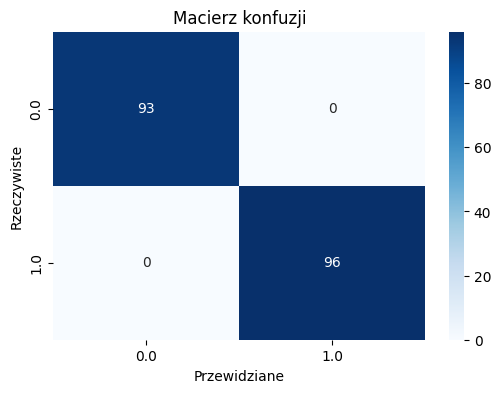

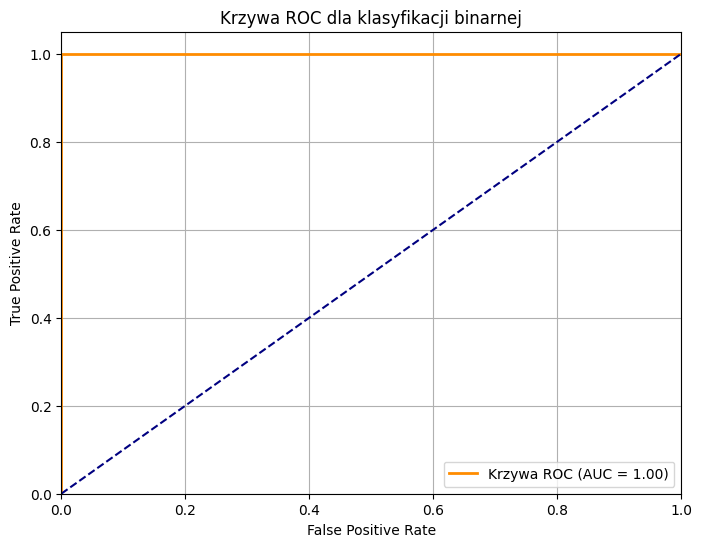

In [72]:
#Wizualizacja graficzna macierzy pomyłek 
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title("Macierz konfuzji")
plt.xlabel("Przewidziane")
plt.ylabel("Rzeczywiste")
plt.show()


#Wykres krzywej ROC
labels_pred_prob = model.predict_proba(features_test)[:, 1]

fpr, tpr, _ = roc_curve(labels_test, labels_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Krzywa ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC dla klasyfikacji binarnej')
plt.legend(loc="lower right")
plt.grid()
plt.show()



Krzywa uczenia:

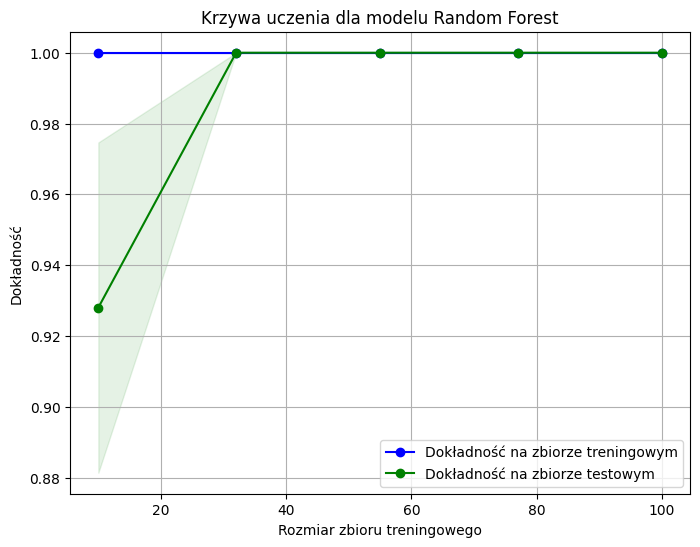

In [73]:
#Generowanie krzywej uczenia
train_sizes, train_scores, test_scores = learning_curve(model, features_train, np.ravel(labels_train), cv=5, scoring='accuracy', n_jobs=-1)

#Obliczanie średniej i odchylenia standardowego
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#Wykres
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Dokładność na zbiorze treningowym", color="blue", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Dokładność na zbiorze testowym", color="green", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="green")
plt.title("Krzywa uczenia dla modelu Random Forest")
plt.xlabel("Rozmiar zbioru treningowego")
plt.ylabel("Dokładność")
plt.legend(loc="best")
plt.grid()
plt.show()